# Machine Learning model for Predicting Linear B-cell Epitopes Using High-Dimensional Protein Features

## Introduction
B-cell epitopes are specific regions on the surface of antigens that are recognized by B-cell receptors and antibodies. Accurate prediction of these linear B-cell epitopes plays a critical role in accelerating vaccine development, diagnostics, and immunotherapy design. However, experimental identification of epitopes is often costly, time-consuming, and limited by biological constraints. Hence, computational methods have emerged as essential tools for screening and prioritizing candidate epitopes.

This coursework aims to tackle the epitope prediction problem using a high-dimensional dataset that was derived from protein sequences, embedded using the ESM-1b model. The dataset contains over 1,200 features per observation and a class label indicating whether or not the protein segment is an epitope.

### Process flow and goals
To solve this problem, I will design a data mining pipeline that will comprise the following four core stages:

**Exploratory Data Analysis (EDA):**

- Understand the data distribution, missing values, outliers, feature types, and class balance.

- Apply visualisation and summarisation techniques to draw insights from high-dimensional data.

**Data Preprocessing and Feature Engineering:**

- Drop non-informative metadata (Info_ columns).

- Apply standard scaling and handle any missing values.

- Reduce dimensionality using unsupervised and/or supervised methods (e.g., PCA, mutual information).

- Address class imbalance using techniques such as SMOTE or cost-sensitive learning.

**Modelling:**

- Train and evaluate multiple classifiers, including Random Forest, XGBoost, and Logistic Regression.

- Use GroupKFold based on Info_cluster to ensure grouped cross-validation and prevent data leakage.

- Select the model with the highest balanced accuracy, a metric well-suited to imbalanced classification.

**Conclusion and Recommendations:**

- Summarize key findings from the EDA, modelling results, and final pipeline performance.

- Offer recommendations for future epitope prediction systems and model refinement.




In [2]:
# Import necessary libraries - initials
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load the dataset
df = pd.read_csv('df.csv', sep=';', engine='python')

## Explore and Understand the data

Exploratory Data Analysis (EDA) will help me to understand the structure, distributions, class balance, and any data quality issues within the dataset, providing insights on the next appropriate step.

### Basic EDA
This will give us basic information about the data such as feature categories, datatypes, missing values, and distribution of outcome class.


Data Shape:
(49606, 1291)

Feature Categories:
Info columns: 9
Feature columns: 1281
Target column: Class

Data types:
float64    1281
object        6
int64         4
Name: count, dtype: int64

Missing values:
feat_esm1b_148     44655
feat_esm1b_1121       88
feat_esm1b_469        88
feat_esm1b_332        88
feat_esm1b_56         88
feat_esm1b_537        88
feat_esm1b_634        88
feat_esm1b_728        88
feat_esm1b_645        88
feat_esm1b_646        88
dtype: int64

Class distribution:
Class
-1    0.983691
 1    0.016309
Name: proportion, dtype: float64


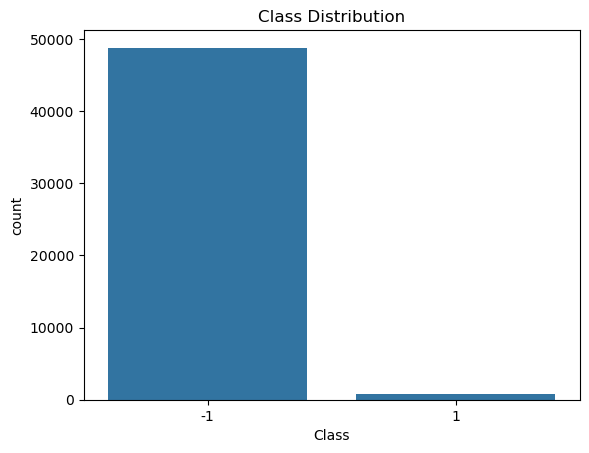

In [19]:
# General overview of the dataset
print("\nData Shape:")
print(df.shape)

# Split column groups to understand the number of features in each category
print("\nFeature Categories:")
info_cols = [col for col in df.columns if col.startswith('Info_')]
feat_cols = [col for col in df.columns if col.startswith('feat_')]
target_col = 'Class'

print(f"Info columns: {len(info_cols)}")
print(f"Feature columns: {len(feat_cols)}")
print(f"Target column: {target_col}")

# Understanding the basic structure of data - data types andd mssing values
print("\nData types:")
print(df.dtypes.value_counts())

print("\nMissing values:")
print(df.isnull().sum().sort_values(ascending=False).head(10))

# Exploring the class distribution
print("\nClass distribution:")
print(df[target_col].value_counts(normalize=True))

sns.countplot(data=df, x=target_col)
plt.title("Class Distribution")
plt.show()

Key findings 
> The data is made up of 49,606 rows and 1,291 columns - out of which 99.2% of the columns are features, and 0.69% are Info columns - indication highly dimensional features
> The feature - `feat_esm1b_148` has the highest number of missing values - 90%
